# Table of Contents
 <p>

In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
from pylab import *
import matplotlib.mlab as mlab

In [3]:
def calc_KL(mu1, lambda1, mu2, lambda2):
    D  = size(mu_h, 1)
    try:
        KL = (1/2) * (  (  log(np.linalg.det(lambda2)) -  log(np.linalg.det(lambda1)) )   +\
                 np.trace(inv(lambda2) * lambda1) +\
            (mu1-mu2) * inv(lambda2) * (mu1-mu2).T - D )
    except:
        KL = float("nan")
    return KL[0,0]

In [4]:
# Crerate truth distribution
D = 2 # dimension
theta = 2.0*pi/12
A = matrix(reshape(array([cos(theta), sin(theta), -sin(theta), cos(theta)]), (2,2)))
mu = matrix(array([0.0, 0.0]))
lambda_ = matrix(inv(A * inv(reshape(array([1,0,0,10]), (2,2))) * A.transpose()))

# initialize
mu_h = matrix(np.random.rand(2))
lambda_h  = matrix(np.zeros([D,D]))

# iteration
max_iter = 16
KL = []

for i in range(max_iter):
    ## update
    mu_h[0,0] = mu[0,0] - 1 / lambda_[0,0] * lambda_[0,1] * (mu_h[0,1] - mu[0,1])
    lambda_h[0,0] = lambda_[0,0]
    mu_h[0,1] = mu[0,1] - 1 / lambda_[1,1] * lambda_[0,1] * (mu_h[0,0] - mu[0,0])
    lambda_h[1,1] = lambda_[1,1]
    
    KL.append(calc_KL(mu_h, lambda_h, mu, lambda_))

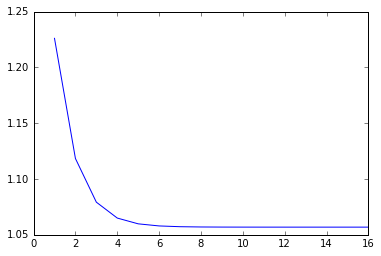

In [5]:
plt.plot(np.arange(1,max_iter+1,1), KL)